# Car Driving Risk Analysis Assignment on Linear Regression

## Importing Essential Libraries

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

## Loading the dataset

In [5]:
df=pd.read_csv("D:\\Datasets\\Car Driving Risk Analysis\\car driving risk analysis.csv")

## Exploratory Data Analysis

In [7]:
df.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


In [8]:
df.tail()

,speed,risk
10,290,82
11,185,59
12,310,93
13,95,18
14,30,2


In [9]:
df.describe()

,speed,risk
count,15.000000,15.000000
mean,179.666667,55.800000
std,92.687391,35.827364
min,30.000000,2.000000
25%,102.500000,19.000000
50%,190.000000,60.000000
75%,250.000000,88.000000
max,310.000000,98.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   15 non-null     int64
 1   risk    15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


In [11]:
df.isnull().sum()

speed    0
risk     0
dtype: int64

In [12]:
df.shape

(15, 2)

## Processing and Visualization

Text(0.5, 1.0, 'Speed vs Risk')

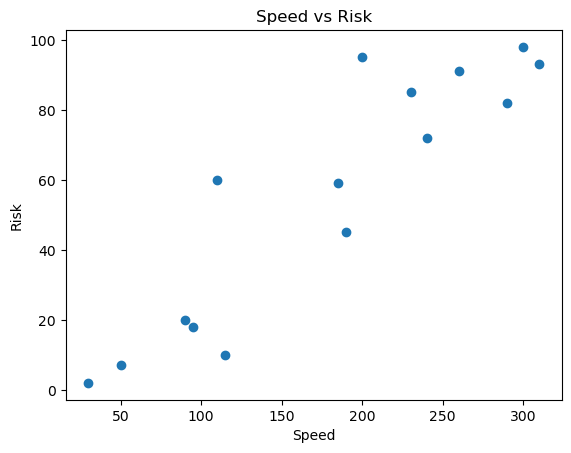

In [14]:
plt.scatter(df["speed"], df["risk"])
plt.xlabel("Speed")
plt.ylabel("Risk")
plt.title("Speed vs Risk")

In [15]:
x=df[["speed"]]
x.head()

,speed
0,200
1,90
2,300
3,110
4,240


In [16]:
y=df[["risk"]]
y.head()

,risk
0,95
1,20
2,98
3,60
4,72


Text(0.5, 1.0, 'Speed vs Risk')

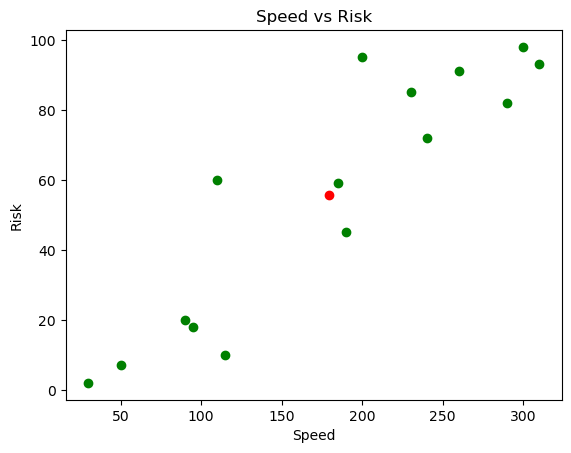

In [17]:
plt.scatter(df["speed"], df["risk"], color="green")
plt.scatter(x.mean(), y.mean(), color="red")
plt.xlabel("Speed")
plt.ylabel("Risk")
plt.title("Speed vs Risk")

## Implementing Linear Regression Model

In [19]:
# test, train spliting
x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.6, test_size=0.4, random_state=42)

In [20]:
reg=LinearRegression()

In [21]:
# Model training
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
reg.predict(x_test)

array([[82.14276359],
       [58.19875573],
       [62.9875573 ],
       [29.4659463 ],
       [35.85101506],
       [59.79502292]])

In [23]:
reg.coef_

array([[0.31925344]])

In [24]:
reg.intercept_

array([-0.86313032])

In [25]:
df["Predicted_y"]=reg.predict(x)

In [26]:
reg.predict([[291]])

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[92.03962017]])

In [27]:
reg.predict([[293]])

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[92.67812705]])

In [28]:
reg.predict([[280]])

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[88.52783235]])

In [29]:
df.head()

,speed,risk,Predicted_y
0,200,95,62.987557
1,90,20,27.869679
2,300,98,94.912901
3,110,60,34.254748
4,240,72,75.757695


In [30]:
df.shape

(15, 3)

## Best Fit Line

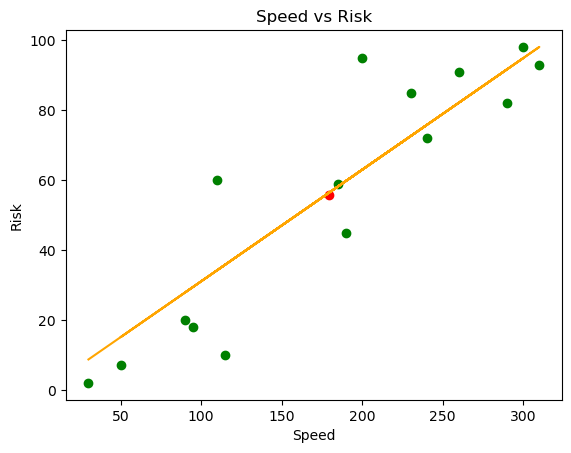

In [32]:
plt.scatter(df["speed"], df["risk"], color="green")
plt.scatter(x.mean(), y.mean(), color="red")
plt.xlabel("Speed")
plt.ylabel("Risk")
plt.title("Speed vs Risk")
plt.plot(x,df["Predicted_y"], color="orange")

In [33]:
df["Loss"]=df["risk"]-df["Predicted_y"]
df.head()

,speed,risk,Predicted_y,Loss
0,200,95,62.987557,32.012443
1,90,20,27.869679,-7.869679
2,300,98,94.912901,3.087099
3,110,60,34.254748,25.745252
4,240,72,75.757695,-3.757695


## MSE and MAE

In [35]:
mse=mean_squared_error(df["risk"], df["Predicted_y"])
mse

217.1191990364231

In [36]:
mae=mean_absolute_error(df["risk"], df["Predicted_y"])
mae

11.754485920104775

## R Score

In [38]:
reg.score(x_test, y_test)

0.6674201309542954

In [39]:
r2_score(y_test,reg.predict(x_test))

0.6674201309542954

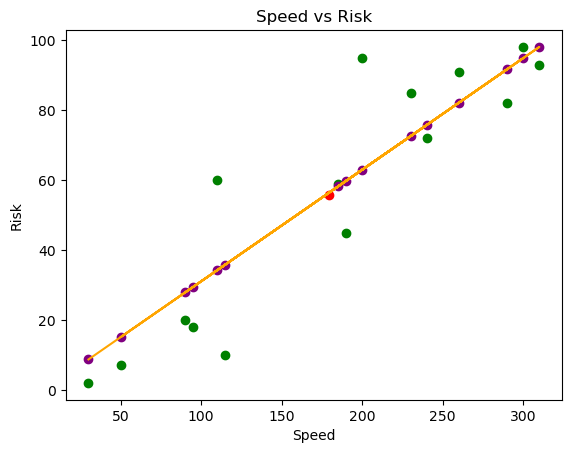

In [40]:
plt.scatter(df["speed"], df["risk"], color="green")
plt.scatter(x.mean(), y.mean(), color="red")
plt.scatter(df["speed"], df["Predicted_y"], color="purple")
plt.xlabel("Speed")
plt.ylabel("Risk")
plt.title("Speed vs Risk")
plt.plot(x,df["Predicted_y"], color="orange")